[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [13]:
!nvidia-smi

Fri Jan 30 16:49:17 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [15]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.00GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)


In [11]:
# Fix for the onnx.helper error
!pip install onnx==1.16.1
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.8 MB/s eta 0:00:00
  Attempting uninstall: onnx
    Found existing installation: onnx 1.20.1
    Uninstalling onnx-1.20.1:
      Successfully uninstalled onnx-1.20.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.40
    Uninstalling ultralytics-8.3.40:
      Successfully uninstalled ultralytics-8.3.40


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [3]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LRYSVbdd6snHXocCkEpE")
project = rf.workspace("four-levent").project("tennis-ball-qwltl-v4g6d")
version = project.version(1)
dataset = version.download("yolov11")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


## Custom Training

In [ ]:
%cd {HOME}

# !yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True
%cd {HOME}


from ultralytics import YOLO
# 1. Load the model
model = YOLO('yolo11n.pt')
# 2. Train with a few extra optimizations
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,      # Forces a specific batch size (good for Colab T4 GPU)
    cache=True,    # Loads images into RAM for MUCH faster training
    patience=20,   # "Early Stopping" - stops if it doesn't improve for 20 epochs
    plots=True
)


/content
/content
New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Tennis-Ball-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

train: Scanning /content/datasets/Tennis-Ball-1/train/labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/Tennis-Ball-1/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100%|██████████| 64/64 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.44G      2.724      32.88     0.9704         25        640: 100%|██████████| 14/14 [00:22<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         64         64          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.36G      2.691      17.32     0.9178         17        640: 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]

                   all         64         64    0.00026     0.0781   0.000145   3.09e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.35G      2.673      14.44     0.9097         16        640: 100%|██████████| 14/14 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         64         64   0.000104     0.0312   5.54e-05   5.54e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.35G      2.774      12.73     0.9598         19        640: 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         64         64   0.000208     0.0625   0.000116   3.08e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.36G      2.707      11.78     0.9202         22        640: 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         64         64   0.000156     0.0469   8.35e-05   4.38e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.35G      2.678      10.51     0.9308         14        640: 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         64         64    0.00135      0.406    0.00192   0.000472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.37G      2.618      8.851      0.935         21        640: 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         64         64    0.00167        0.5       0.17     0.0443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.37G      2.811      10.46     0.9308         16        640: 100%|██████████| 14/14 [00:04<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         64         64      0.991     0.0938      0.304     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.37G      2.649      8.308     0.9167         20        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         64         64   0.000208     0.0625    0.00311   0.000633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.37G      2.576      7.716     0.9182         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         64         64   7.26e-05     0.0156    3.9e-05    3.9e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.37G      2.801      7.102      0.935         18        640: 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         64         64    0.00895     0.0312    0.00106   0.000562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.37G      2.566      5.338     0.9115         20        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         64         64    0.00895     0.0312    0.00106   0.000562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.37G        2.7       5.82     0.8674         21        640: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         64         64    0.00895     0.0312    0.00106   0.000562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.37G       2.56      5.365     0.8938         11        640: 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         64         64      0.775      0.188      0.207     0.0609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G      2.557       4.58     0.8934         22        640: 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         64         64      0.841      0.328      0.365      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.37G      2.699      3.909     0.8908         24        640: 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         64         64      0.593      0.547      0.456      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.37G      2.611       3.63     0.8977         13        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         64         64      0.791      0.593      0.605      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.36G       2.64       4.61     0.8051         16        640:  14%|█▍        | 2/14 [00:00<00:03,  3.90it/s]

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix_normalized.png			   train_batch1260.jpg
confusion_matrix.png				   train_batch1261.jpg
events.out.tfevents.1769787097.467f70e97038.406.0  train_batch1262.jpg
F1_curve.png					   train_batch1.jpg
labels_correlogram.jpg				   train_batch2.jpg
labels.jpg					   val_batch0_labels.jpg
P_curve.png					   val_batch0_pred.jpg
PR_curve.png					   val_batch1_labels.jpg
R_curve.png					   val_batch1_pred.jpg
results.csv					   weights
results.png


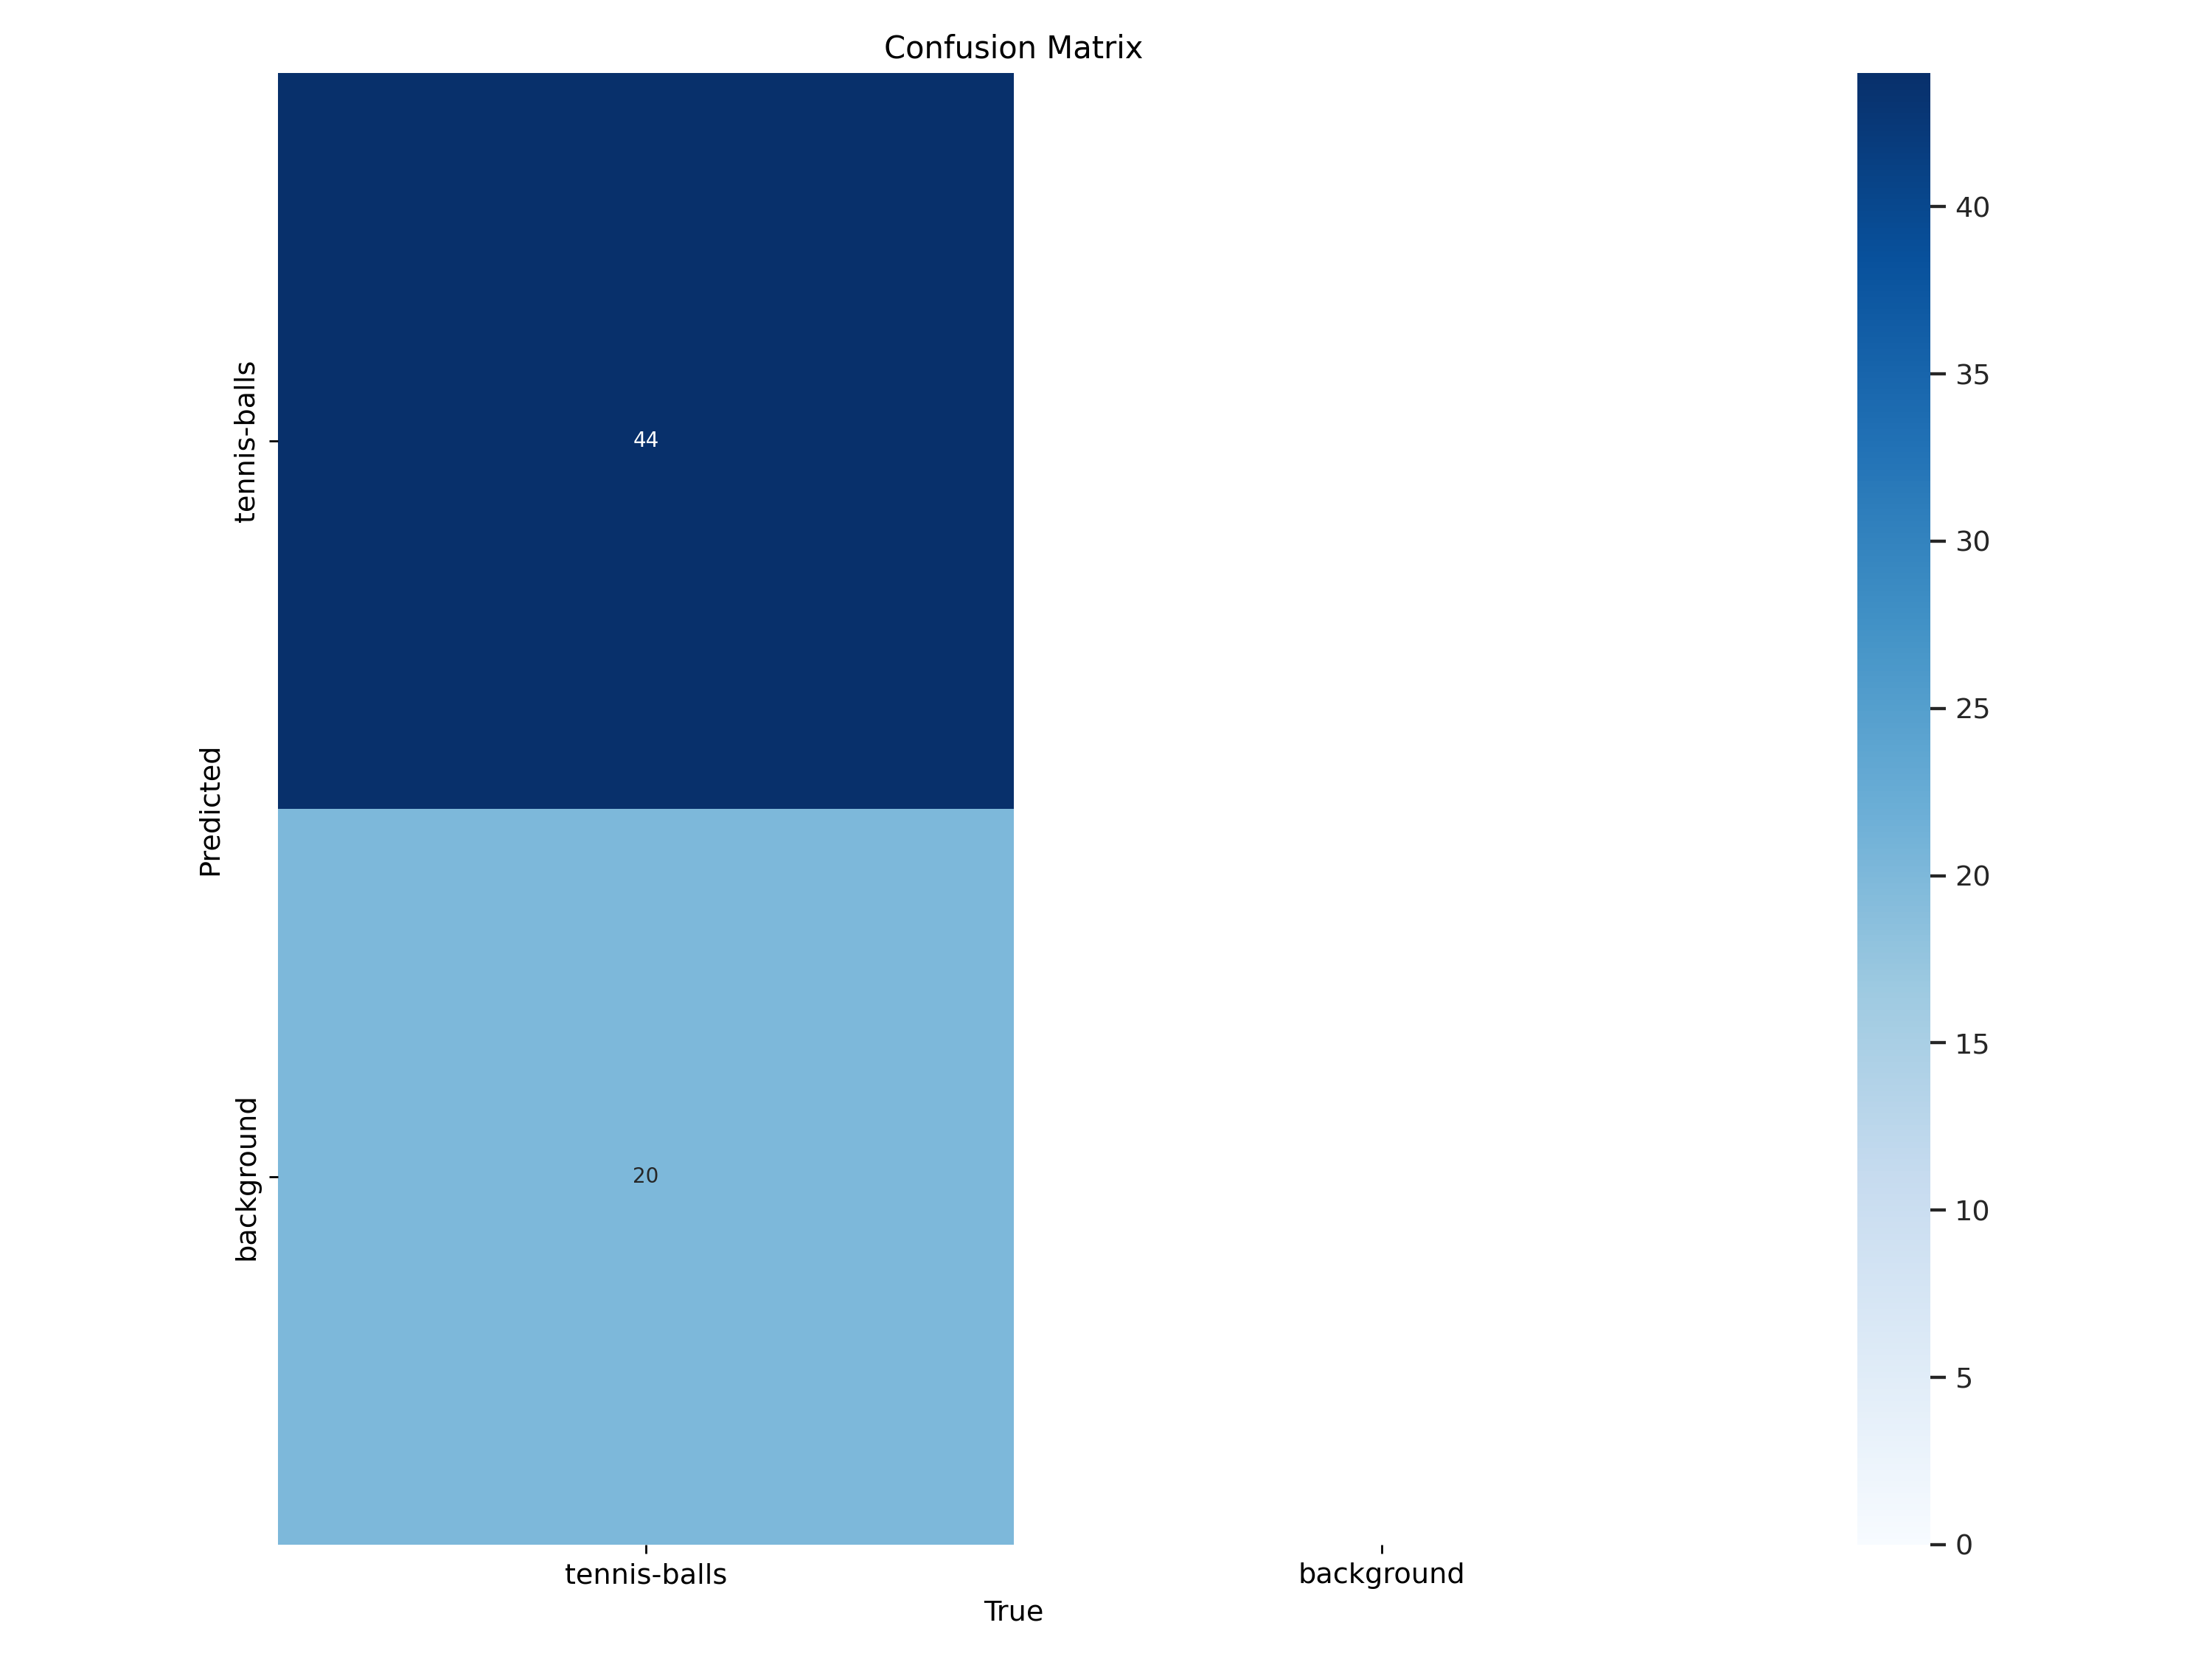

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

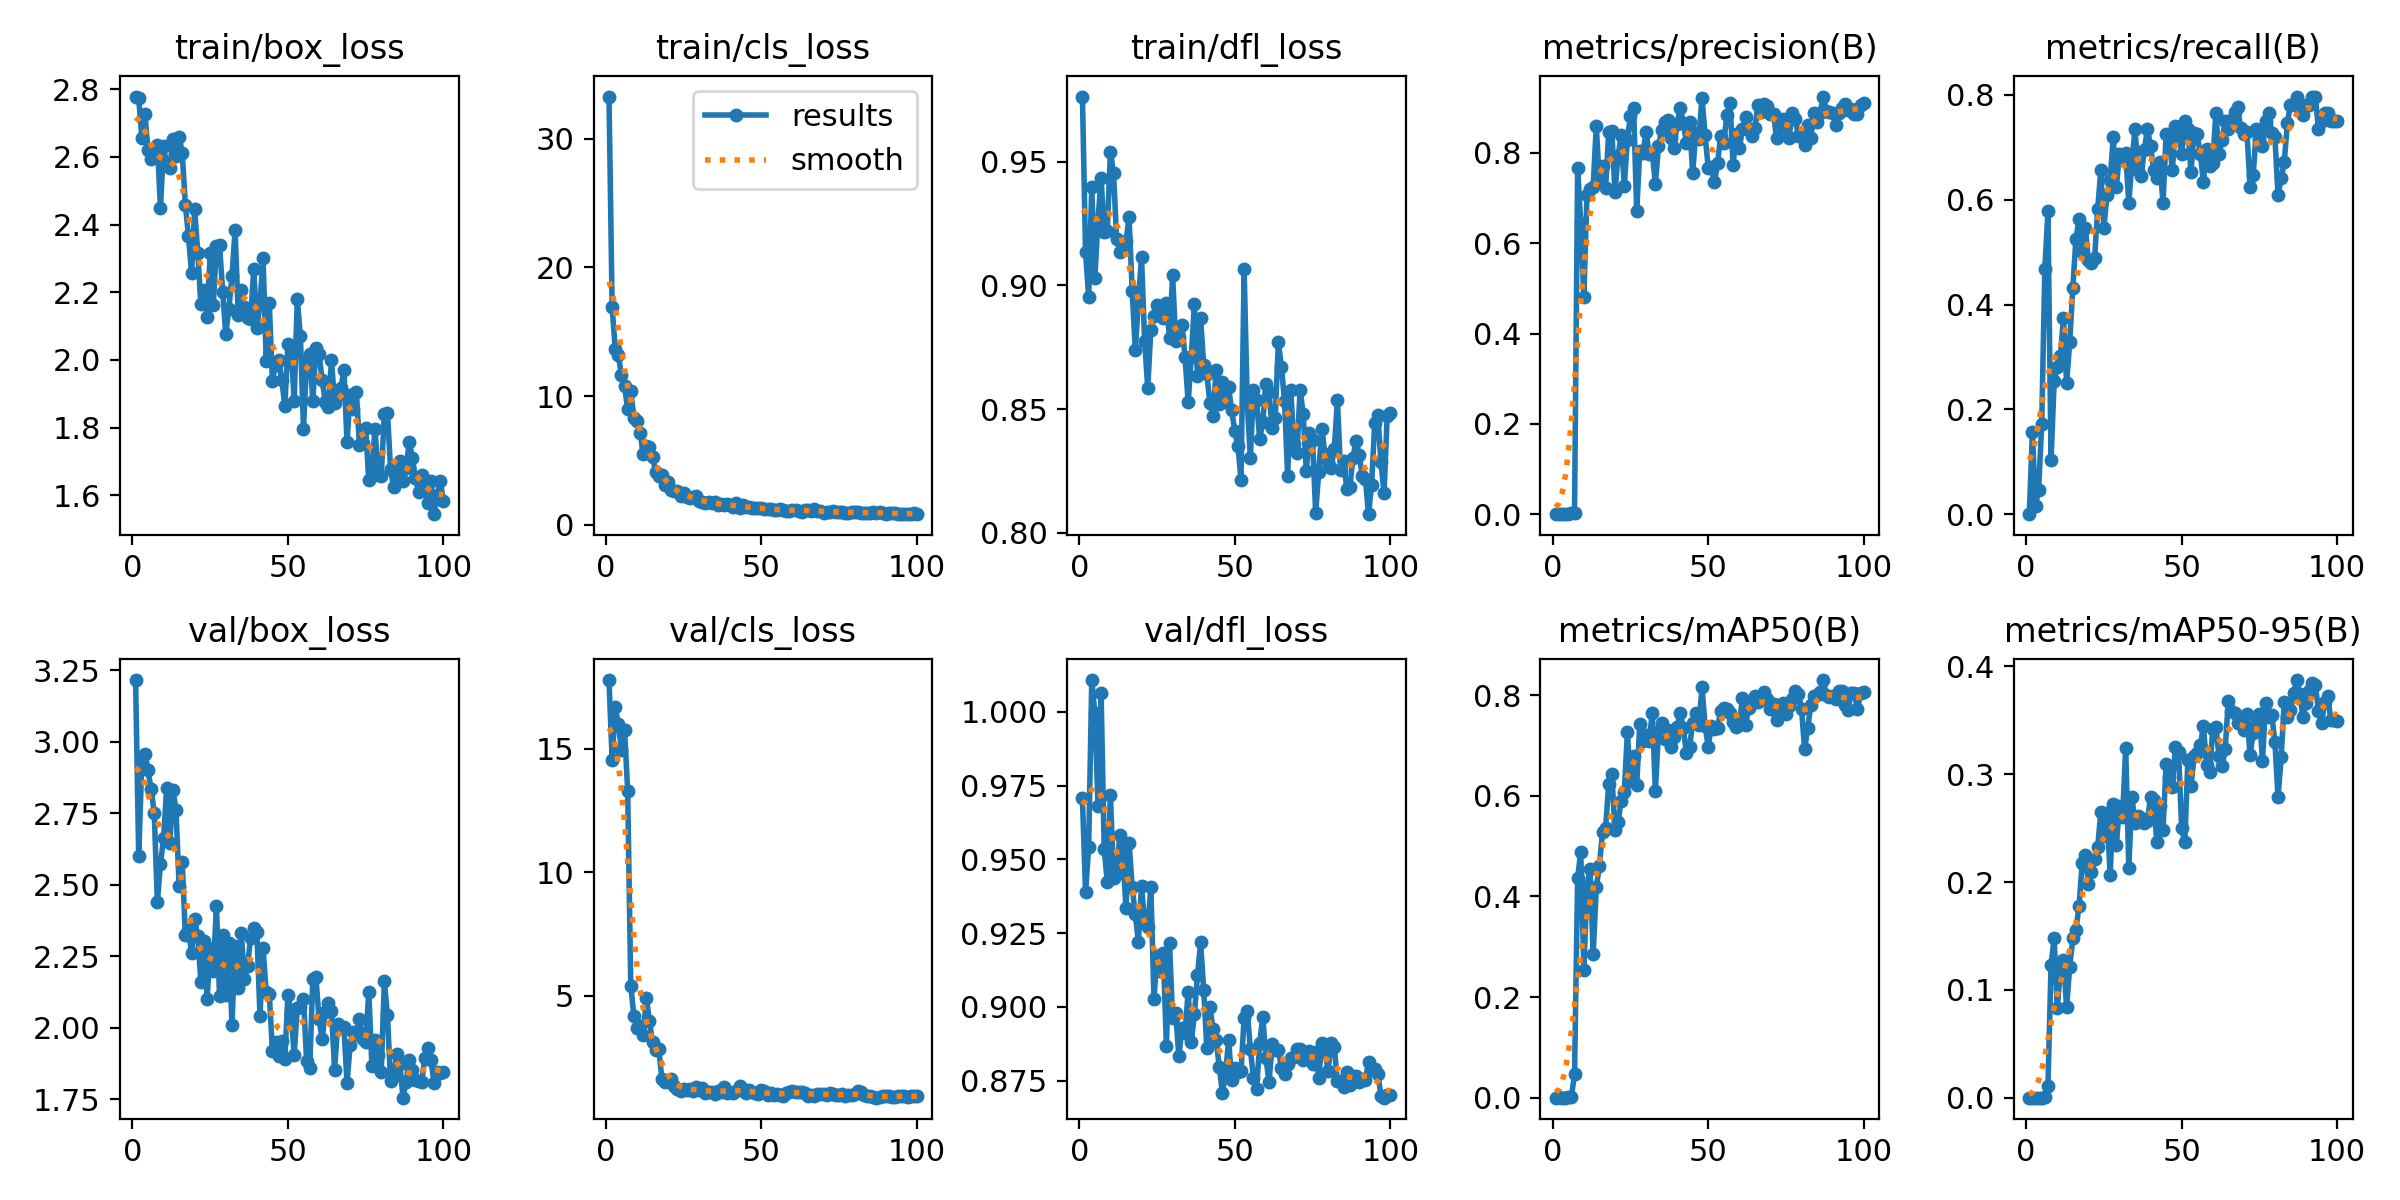

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [8]:
!pip install -U ultralytics tensorflow==2.19.0 ml-dtypes==0.5.1 onnx2tf==1.29.19 onnx==1.19.0


  Using cached ultralytics-8.4.9-py3-none-any.whl.metadata (38 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached onnx2tf-1.29.19-py3-none-any.whl.metadata (154 kB)
  Using cached onnx-1.19.0-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (7.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached onnxruntime-1.23.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (4.9 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached onnxsim-0.4.36.tar.gz (21.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached onnxoptimizer-0.4.2-cp312-abi3-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (3.1 kB)
  Using cached ai_edge_litert-2.1.0-cp312-cp312-manylinux_2_27_x86_64.whl.metadata (2.1 kB)
 

# Export

In [8]:
# Convert our trained tennis brain to a mobile-friendly file
import os
from ultralytics import YOLO
# Force the absolute path to the root 'content' folder
model_path = '/content/runs/detect/train/weights/best.pt'
data_path = f"{dataset.location}/data.yaml"
print(f"✅ Correct Path: {model_path}")
# Load and Export
model = YOLO(model_path)
model.export(
    format='tflite',
    int8=True,
    data=data_path
)

✅ Correct Path: /content/runs/detect/train/weights/best.pt
Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)
requirements: Ultralytics requirements ['ai-edge-litert>=1.2.0', 'onnx2tf>=1.26.3,<1.29.0', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 5.55s
Prepared 4 packages in 439ms
Uninstalled 1 package in 10ms
Installed 4 packages in 108ms
 + ai-edge-litert==2.1.2
 + backports-strenum==1.3.1
 - onnx2tf==1.22.3
 + onnx2tf==1.28.8
 + onnxruntime==1.23.2

requirements: AutoUpdate success ✅ 6.6s
WARNING ⚠️ requirements: Rest

Exporting to ONNX opset version 21 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 1.9s, saved as '/content/runs/detect/train/weights/best.onnx' (10.2 MB)
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/datasets/calibration_image_sample_data_20x128x128x3_float32.npy...: 100% ━━━━━━━━━━━━ 1/1 50.4files/s 0.0s
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.8...
Saved artifact at '/content/runs/detect/train/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 5, 8400), dtype=tf.float32, name=None)
Captures:
  132809016422096: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  132809016420560: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  132809016421328: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  132809016425168: TensorSpec(shape=(4, 2), dtype=tf.int32, n

'/content/runs/detect/train/weights/best_saved_model/best_int8.tflite'

# Sanity check

In [12]:
import os
import tensorflow as tf
# List of paths where YOLO usually saves the exported files
possible_paths = [
    '/content/runs/detect/train/weights/best_int8.tflite',
    '/content/runs/detect/train/weights/best_full_integer_quant.tflite',
    'best_int8.tflite',
    'best_full_integer_quant.tflite'
]
found_any = False
for path in possible_paths:
    if os.path.exists(path):
        found_any = True
        interpreter = tf.lite.Interpreter(model_path=path)
        # Check the first input tensor data type
        dtype = interpreter.get_input_details()[0]['dtype']

        if dtype == tf.uint8 or dtype == tf.int8:
            print(f"✅ FOUND INT8: {path} (Type: {dtype}) -> DOWNLOAD THIS!")
        else:
            print(f"ℹ️ FOUND FLOAT32: {path} (Type: {dtype}) -> THIS WILL BE SLOW.")
if not found_any:
    print("❌ No .tflite files found. Did the export in the previous cell finish?")

❌ No .tflite files found. Did the export in the previous cell finish?


## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.